# 😎 Yo!
The first notebook of this course! The content till now was repetative... now we are getting into something **more interesting** 🔥

Let's just code things out, as we have already spent time in the theory in the markdown.

# 1️⃣ Upper Confidence Bound

## The algorithm (messy)
<img src="./images/UCB_Algorithm_Slide.png">

## The algorithm (clean 🌟✨)
1. Iterate through all records (till 10,000)
2. For each record, check for each ad if it is selected.
3. If the ad is not selected, which it wouldn't be in the first run, then **this means we are first time checking this and without any knowledge** we will give it `inf` upper bound. So, unless there is another unchecked ad, this ad will be selected for this round.
4. If the ad is selected we will calculate its upper bound and check if this upper bound is more than the max upper bound, if yes then this ad will be selected.

> This algorithm is very simple. The ad will be selected based on the upper bound. If the ad is first time coming, then it will have the highest upper bound and if not, then (which will be the case later) then upper bound will be calculated through formulas.

## 💰 Reward mechanism

- Here we will select the ad first and then see the reward.
- When we select the ad, we expect it to give the positive reward.
- **So first** ad selection happens (with upper bound) and then the reward. The reward can be 0 or 1.
- For example, if some ad is selected by the algo but it can have `0` reward! So, next time based on its average reward, there will be lesser chances that this ad will be selected.
- On the long run, best ad will be selected more often and it will also give `1` reward more often.

In [6]:
import pandas as pd

df = pd.read_csv("./data/Ads_CTR_Optimisation.csv")
df.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


> ## 👇🏻 Explanation
>
> - There are total `10,000` samples, and each record represents a different user who was represented total 10 ads. The `1` and `0` are self explanatory.
> - Our goal is to **use such an algorithm** which can find the **best ad** which has the highest CTR before 10,000 customers... so in real life we won't have this data but will have the online learning kind of scenario.
> - Note that the `1` and `0` are the *rewards*. In this case, they are just binary but in other case the reward may increase or decrease. *(That's why in code we won't hardcode the reward - more on this later)*.

In [12]:
# Just to check...
df.sum().sort_values(ascending=False)

Ad 5     2695
Ad 8     2091
Ad 1     1703
Ad 2     1295
Ad 4     1196
Ad 7     1112
Ad 9      952
Ad 3      728
Ad 10     489
Ad 6      126
dtype: int64

> The **AD 5** is the best ad in the dataset because it has the most clicks.

# 👨🏻‍💻 Implementation of UCB

COMMENT EACH CODE!!

In [7]:
import math
import matplotlib.pyplot as plt

In [86]:
total_users = 10_000
total_ads = 10

# keep track of how many times the given ad is selected (so to average the reward)
ad_selected_n_times = [0] * total_ads 

# the given ad's total reward till now (so to calculate the upper bound)
ad_rewards = [0] * total_ads 

# just to plot which ad is selected the most
ads_selected = [] 

In [87]:
for i in range(total_users): # for all users
    ad = 0 # initiate the selected ad with `0` 
    max_upper_bound = 0 # reset the max_bound (if new ad comes it will be selected)
    
    for j in range(total_ads):
        if ad_selected_n_times[j] > 0: # means the ad is selected and not new
            average_reward = ad_rewards[j] / ad_selected_n_times[j]
            delta_j = math.sqrt(3/2 * math.log(i + 1) / ad_selected_n_times[j])
            upper_bound = average_reward + delta_j
        else: # the ad is new, so MUST select this (hence giving inf upper bound)
            upper_bound = 1e420 # very large number
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = j
    
    reward = df.iloc[i, ad] # the current reward for this ad
    ads_selected.append(ad) # adding this ad
    ad_selected_n_times[ad] = ad_selected_n_times[ad] + 1 # updating the n for this ad
    ad_rewards[ad] = ad_rewards[ad] + reward # updating the selected ad's reward

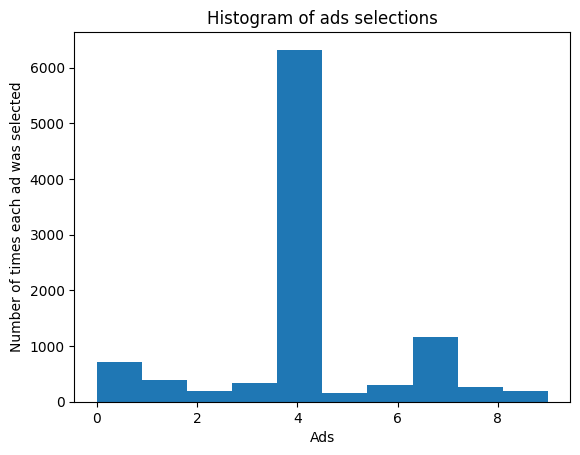

In [88]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

### Great! 🎆
The UCB is now implemented!

In [79]:
def runUCB(total_users):
    total_ads = 10
    
    # keep track of how many times the given ad is selected (so to average the reward)
    ad_selected_n_times = [0] * total_ads 
    
    # the given ad's total reward till now (so to calculate the upper bound)
    ad_rewards = [0] * total_ads 
    
    # just to plot which ad is selected the most
    ads_selected = [] 
    
    for i in range(total_users): # for all users
        ad = 0 # initiate the selected ad with `0` 
        max_upper_bound = 0 # reset the max_bound (if new ad comes it will be selected)
        
        for j in range(total_ads):
            if ad_selected_n_times[j] > 0: # means the ad is selected and not new
                average_reward = ad_rewards[j] / ad_selected_n_times[j]
                delta_j = math.sqrt(3/2 * math.log(i + 1) / ad_selected_n_times[j])
                upper_bound = average_reward + delta_j
            else: # the ad is new, so MUST select this (hence giving inf upper bound)
                upper_bound = 1e420 # very large number
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                ad = j
        
        reward = df.iloc[i, ad] # the current reward for this ad
        ads_selected.append(ad) # adding this ad
        ad_selected_n_times[ad] = ad_selected_n_times[ad] + 1 # updating the n for this ad
        ad_rewards[ad] = ad_rewards[ad] + reward # updating the selected ad's reward
    
    plt.hist(ads_selected)
    plt.title(f'Histogram of ads selections for {total_users} users!')
    plt.xlabel('Ads')
    plt.ylabel('Number of times each ad was selected')
    plt.show()

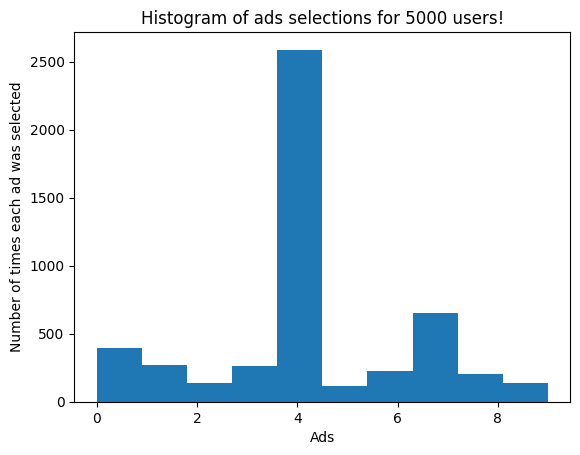

In [80]:
runUCB(total_users=5000)

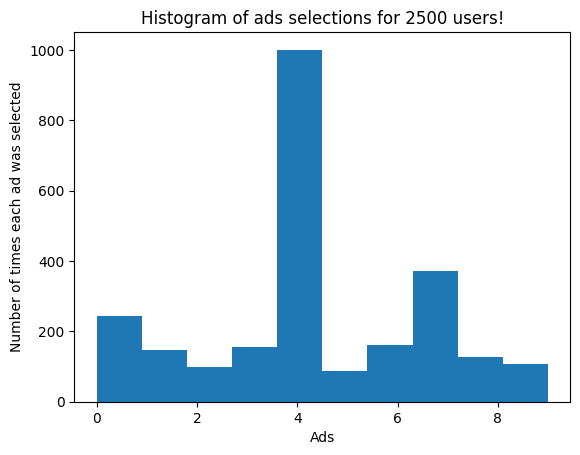

In [81]:
runUCB(total_users=2500)

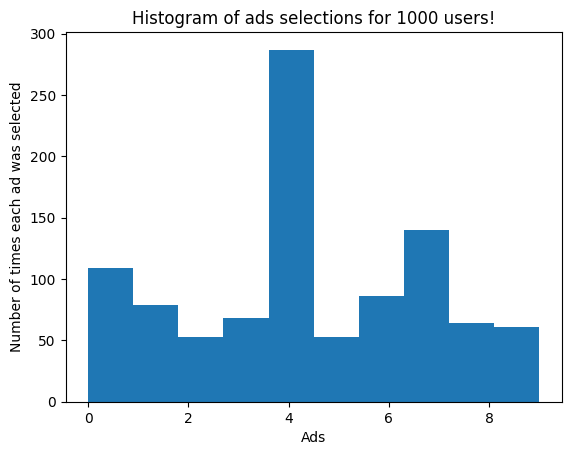

In [82]:
runUCB(total_users=1000)

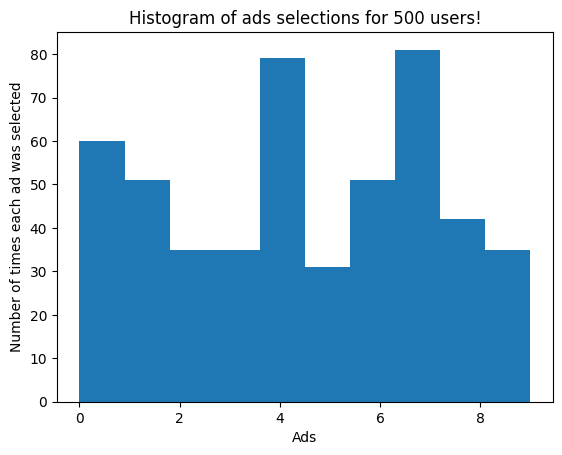

In [83]:
runUCB(total_users=500)

We can see that the UCB is able to get the `5` as the best ad till 1000 users testing... and on 500 users it doesn't have enough time to conclude that the 5th is the best ad.

> Let's see how the **Thompson Sampling** helps!

# 2️⃣ Thompson Sampling

In [10]:
import random

In [11]:
total_users = 10_000
total_ads = 10

n_1_rewards = [0] * total_ads 
n_0_rewards = [0] * total_ads 

# just to plot which ad is selected the most
ads_selected = [] 

In [12]:
for i in range(total_users): # for all users
    ad = 0 # initiate the selected ad with `0` 
    max_random = 0 # reset the max_bound (if new ad comes it will be selected)
    
    for j in range(total_ads):
        random_beta = random.betavariate(n_1_rewards[j]+1, n_0_rewards[j]+1)
        if random_beta > max_random:
            max_random = random_beta
            ad = j

    ads_selected.append(ad)
    reward = df.iloc[i, ad]
    if reward == 1:
        n_1_rewards[ad] += 1
    else:
        n_0_rewards[ad] += 1

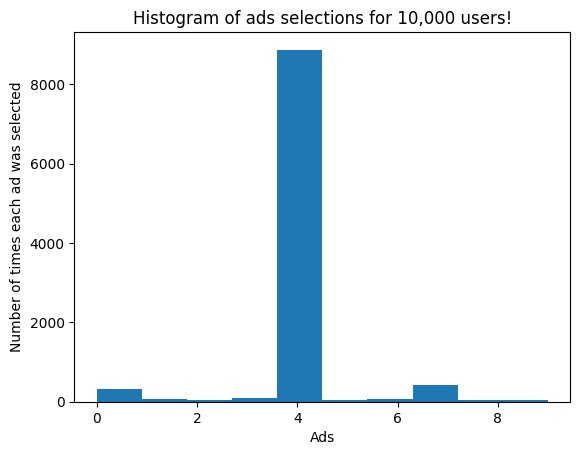

In [14]:
plt.hist(ads_selected)
plt.title(f'Histogram of ads selections for 10,000 users!')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [15]:
def  runThompson(total_users):
    total_ads = 10
    
    n_1_rewards = [0] * total_ads 
    n_0_rewards = [0] * total_ads 
    
    # just to plot which ad is selected the most
    ads_selected = [] 
    for i in range(total_users): # for all users
        ad = 0 # initiate the selected ad with `0` 
        max_random = 0 # reset the max_bound (if new ad comes it will be selected)
        
        for j in range(total_ads):
            random_beta = random.betavariate(n_1_rewards[j]+1, n_0_rewards[j]+1)
            if random_beta > max_random:
                max_random = random_beta
                ad = j
    
        ads_selected.append(ad)
        reward = df.iloc[i, ad]
        if reward == 1:
            n_1_rewards[ad] += 1
        else:
            n_0_rewards[ad] += 1
    
    plt.hist(ads_selected)
    plt.title(f'Histogram of ads selections for {total_users} users!')
    plt.xlabel('Ads')
    plt.ylabel('Number of times each ad was selected')
    plt.show()

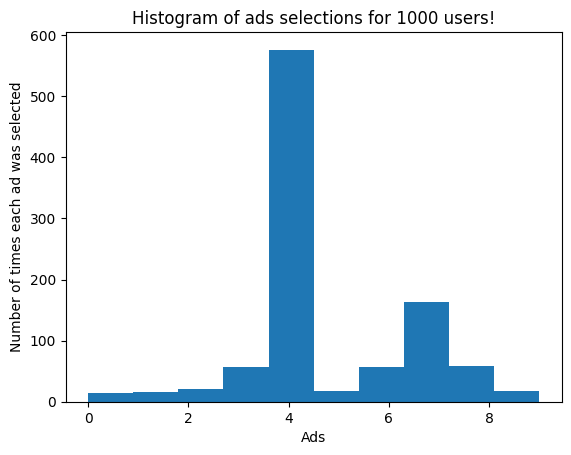

In [16]:
runThompson(total_users=1000)

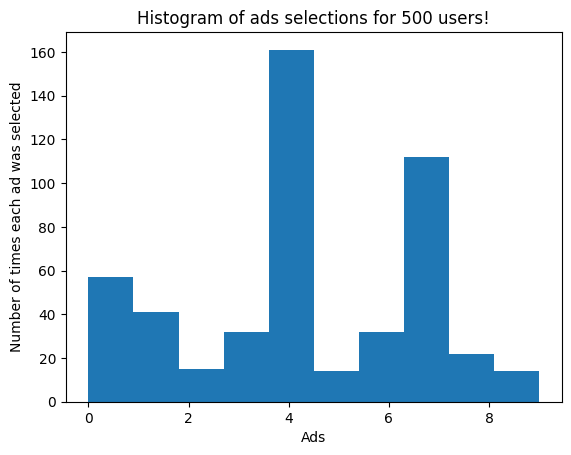

In [17]:
runThompson(total_users=500)

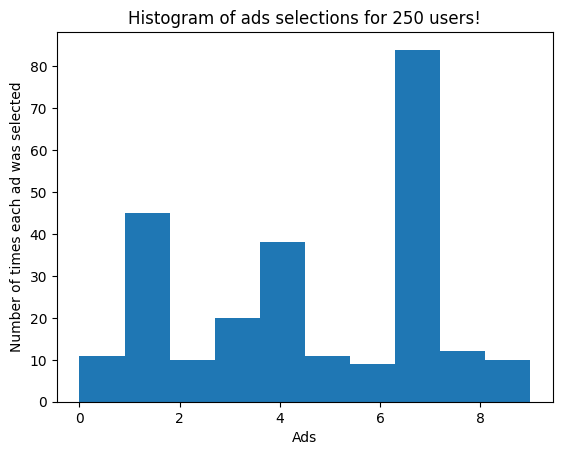

In [18]:
runThompson(total_users=250)

# Cool!